# Linear Regression house_prices

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [2]:
#Read the data
df = pd.read_csv("house_prices.csv")
# showing the first 5 lines of the data!
df.head()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 7)

In [4]:
df.describe()

,Transaction,House age,Distance to MRT station,Number of convenience stores,Latitude,Longitude,House unit price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
#check for null values
pd.isnull(df).sum()

Transaction                     0
House age                       0
Distance to MRT station         0
Number of convenience stores    0
Latitude                        0
Longitude                       0
House unit price                0
dtype: int64

<AxesSubplot:>

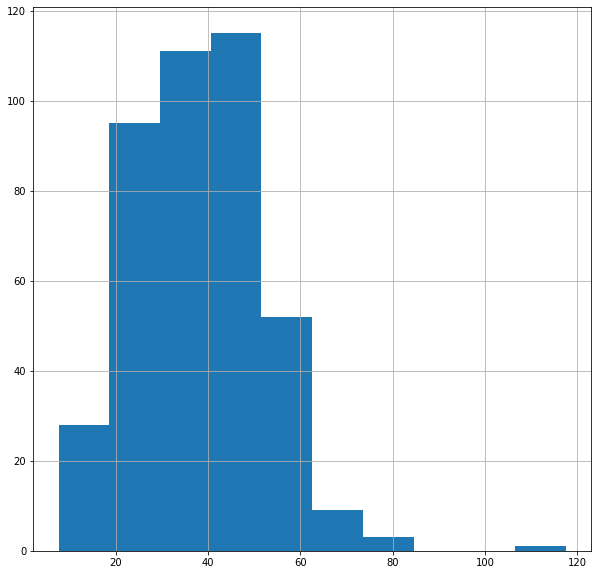

In [6]:
df["House unit price"].hist(label=" House unit price", figsize=(10,10))

<AxesSubplot:>

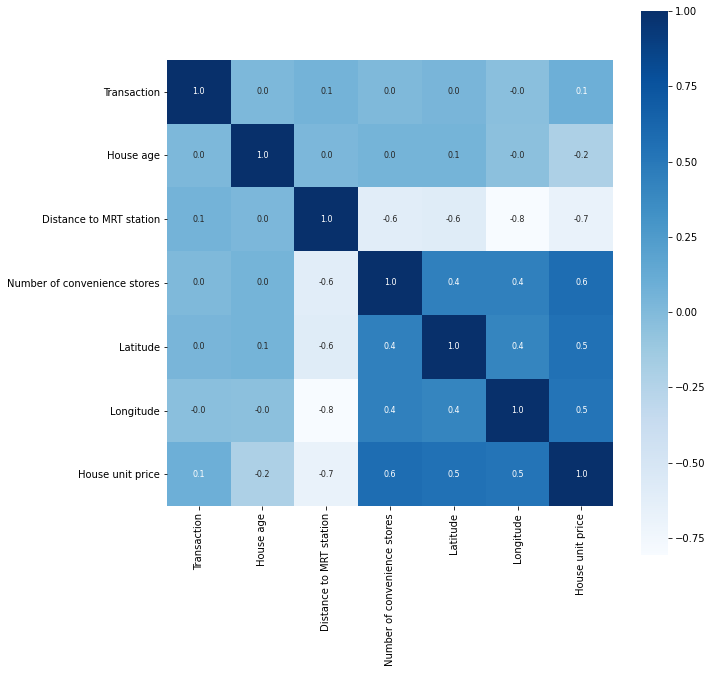

In [7]:
correlation = df.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [8]:
X = df.drop(['House unit price'], axis=1)# features 
Y = df['House unit price'] # target 
print(X)
print(Y)

     Transaction  House age  Distance to MRT station  \
0       2012.917       32.0                 84.87882   
1       2012.917       19.5                306.59470   
2       2013.583       13.3                561.98450   
3       2013.500       13.3                561.98450   
4       2012.833        5.0                390.56840   
..           ...        ...                      ...   
409     2013.000       13.7               4082.01500   
410     2012.667        5.6                 90.45606   
411     2013.250       18.8                390.96960   
412     2013.000        8.1                104.81010   
413     2013.500        6.5                 90.45606   

     Number of convenience stores  Latitude  Longitude  
0                              10  24.98298  121.54024  
1                               9  24.98034  121.53951  
2                               5  24.98746  121.54391  
3                               5  24.98746  121.54391  
4                               5  24.9793

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=0)
# Training dataset
print(X_train.shape)
print(y_train.shape)
# Testing dataset
print(X_test.shape)
print(y_test.shape)

(351, 6)
(351,)
(63, 6)
(63,)


## LinearRegression approach

In [10]:
model = LinearRegression()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 
def regression_results(y_true, y_pred): # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred) 
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred) 
    print('explained_variance: ', round(explained_variance,4)) 
    print('mean_squared_log_error: ', round(mean_squared_log_error,4)) 
    print('r2: ', round(r2,4)) 
    print('mean_absolute_error: ', round(mean_absolute_error,4)) 
    print('mean_squared_error: ', round(mse,4)) 
    print('RMSE: ', round(np.sqrt(mse)))
print("Linear Regression Model")
regression_results(y_test, y_pred)


Linear Regression Model
explained_variance:  0.6823
mean_squared_log_error:  0.0394
r2:  0.68
mean_absolute_error:  5.3769
mean_squared_error:  48.9438
RMSE:  7.0


In [11]:
df2=pd.DataFrame(y_pred)
df3=pd.DataFrame(y_test)
df2=df2.join(df3.reset_index())
df2=df2.drop(['index'],axis=1)
df2.rename({0:'y_pred','second_degree':'y_test'}, axis=1,inplace=True)
df2


,y_pred,House unit price
0,39.633449,45.3
1,12.781255,14.4
2,42.192237,46.0
3,12.592675,15.6
4,41.765243,50.2
...,...,...
58,43.880456,39.3
59,32.541890,28.8
60,44.253069,42.3
61,44.033637,44.3


<Figure size 864x864 with 0 Axes>

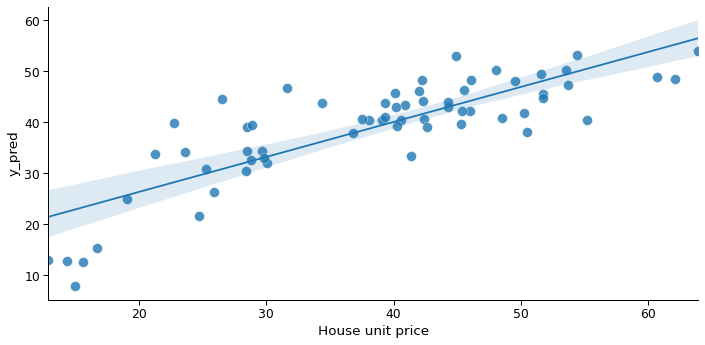

In [13]:
plt.figure(figsize=(12,12))

sns.set_context('paper',font_scale=1.4)
sns.lmplot(data=df2, x='House unit price',y='y_pred',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'},height=5,aspect=2)

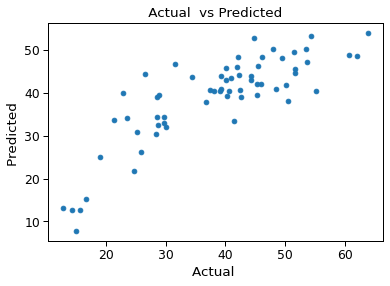

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual  vs Predicted ")
plt.show()

In [15]:
 model.coef_

array([ 4.67857744e+00, -2.58421926e-01, -4.28607244e-03,  1.21784177e+00,
        2.23558483e+02, -1.45002564e+00])

In [16]:
#define cross-validation method to use
cv = KFold(n_splits=10)
#use k-fold CV to evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores

array([-5.63525622, -5.32826016, -7.00558528, -7.203438  , -4.75428044,
       -5.58200049, -7.91894667, -6.73522009, -5.12268368, -6.65771269])

In [17]:
#view mean absolute error
mean(absolute(scores))

6.194338372529286

## neural_network  approach

In [18]:
model = MLPRegressor()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 
def regression_results(y_true, y_pred): # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred) 
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred) 
    print('explained_variance: ', round(explained_variance,4)) 
    print('mean_squared_log_error: ', round(mean_squared_log_error,4)) 
    print('r2: ', round(r2,4)) 
    print('mean_absolute_error: ', round(mean_absolute_error,4)) 
    print('mean_squared_error: ', round(mse,4)) 
    print('RMSE: ', round(np.sqrt(mse)))
print("Linear Regression Model")
regression_results(y_test, y_pred)


Linear Regression Model
explained_variance:  0.7448
mean_squared_log_error:  0.0349
r2:  0.7191
mean_absolute_error:  5.0987
mean_squared_error:  42.9676
RMSE:  7.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
df2=pd.DataFrame(y_pred)
df3=pd.DataFrame(y_test)
df2=df2.join(df3.reset_index())
df2=df2.drop(['index'],axis=1)
df2.rename({0:'y_pred','second_degree':'y_test'}, axis=1,inplace=True)
df2


,y_pred,House unit price
0,48.441256,45.3
1,19.305205,14.4
2,43.254622,46.0
3,19.294430,15.6
4,47.479015,50.2
...,...,...
58,49.592064,39.3
59,36.280437,28.8
60,38.042168,42.3
61,44.814418,44.3


<Figure size 864x864 with 0 Axes>

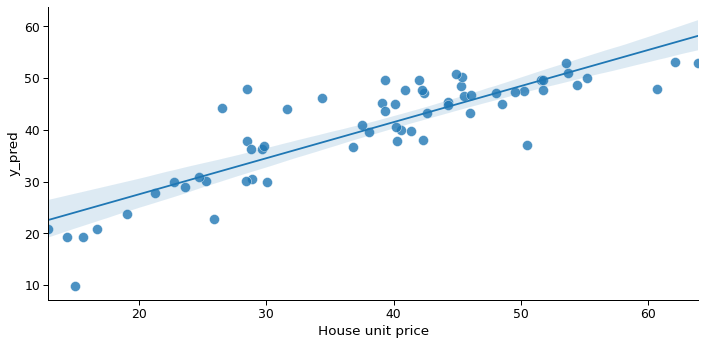

In [20]:
plt.figure(figsize=(12,12))

sns.set_context('paper',font_scale=1.4)
sns.lmplot(data=df2, x='House unit price',y='y_pred',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'},height=5,aspect=2)

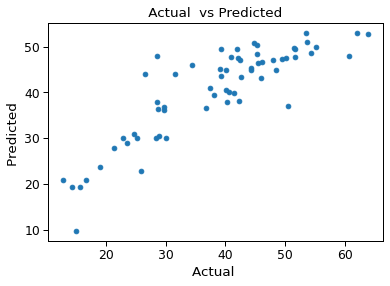

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual  vs Predicted ")
plt.show()

## KNeighborsRegressor approach

In [22]:
model = KNeighborsRegressor()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 
def regression_results(y_true, y_pred): # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred) 
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred) 
    print('explained_variance: ', round(explained_variance,4)) 
    print('mean_squared_log_error: ', round(mean_squared_log_error,4)) 
    print('r2: ', round(r2,4)) 
    print('mean_absolute_error: ', round(mean_absolute_error,4)) 
    print('mean_squared_error: ', round(mse,4)) 
    print('RMSE: ', round(np.sqrt(mse)))
print("Linear Regression Model")
regression_results(y_test, y_pred)


Linear Regression Model
explained_variance:  0.6179
mean_squared_log_error:  0.0395
r2:  0.5893
mean_absolute_error:  5.9724
mean_squared_error:  62.8206
RMSE:  8.0


In [23]:
df2=pd.DataFrame(y_pred)
df3=pd.DataFrame(y_test)
df2=df2.join(df3.reset_index())
df2=df2.drop(['index'],axis=1)
df2.rename({0:'y_pred','second_degree':'y_test'}, axis=1,inplace=True)
df2


,y_pred,House unit price
0,51.02,45.3
1,18.10,14.4
2,45.68,46.0
3,18.52,15.6
4,33.90,50.2
...,...,...
58,59.72,39.3
59,39.40,28.8
60,35.56,42.3
61,53.42,44.3


<Figure size 864x864 with 0 Axes>

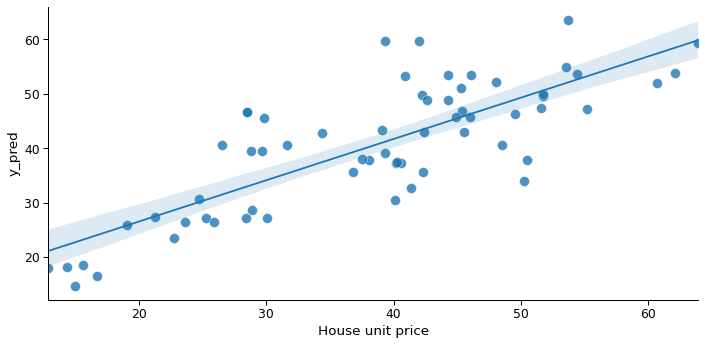

In [24]:
plt.figure(figsize=(12,12))

sns.set_context('paper',font_scale=1.4)
sns.lmplot(data=df2, x='House unit price',y='y_pred',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'},height=5,aspect=2)

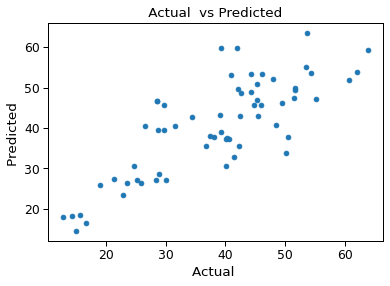

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual  vs Predicted ")
plt.show()

## LinearSVR approach

In [28]:
model = LinearSVR()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 
def regression_results(y_true, y_pred): # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred) 
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
     
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred) 
    print('explained_variance: ', round(explained_variance,4)) 
     
    print('r2: ', round(r2,4)) 
    print('mean_absolute_error: ', round(mean_absolute_error,4)) 
    print('mean_squared_error: ', round(mse,4)) 
    print('RMSE: ', round(np.sqrt(mse)))
print("Linear Regression Model")
regression_results(y_test, y_pred)


Linear Regression Model
explained_variance:  0.5674
r2:  0.5502
mean_absolute_error:  6.6278
mean_squared_error:  68.7988
RMSE:  8.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:
df2=pd.DataFrame(y_pred)
df3=pd.DataFrame(y_test)
df2=df2.join(df3.reset_index())
df2=df2.drop(['index'],axis=1)
df2.rename({0:'y_pred','second_degree':'y_test'}, axis=1,inplace=True)
df2


,y_pred,House unit price
0,43.961019,45.3
1,1.100077,14.4
2,38.352620,46.0
3,0.749608,15.6
4,43.267956,50.2
...,...,...
58,45.071169,39.3
59,36.010344,28.8
60,36.234591,42.3
61,39.406180,44.3


<Figure size 864x864 with 0 Axes>

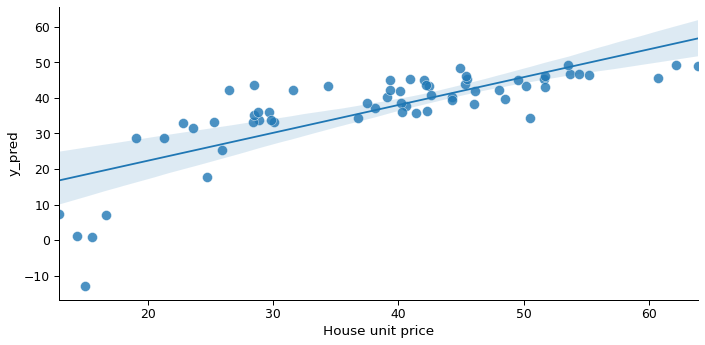

In [30]:
plt.figure(figsize=(12,12))

sns.set_context('paper',font_scale=1.4)
sns.lmplot(data=df2, x='House unit price',y='y_pred',scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'w'},height=5,aspect=2)

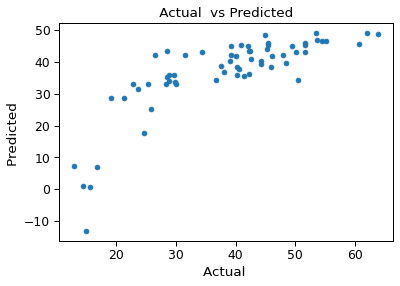

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title(" Actual  vs Predicted ")
plt.show()

## <a id='conclusions'></a>
## Conclusions:

#### LinearRegression is the better model for this data.